<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/SVM_SVR(Support_Vector).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

seed = 1234
np.random.seed(seed)

In [2]:
# 데이터 생성
X1, y1 = make_classification(n_samples=100, # 생성할 데이터 수
                             n_features=2, # 사용할 특성의 수
                             n_redundant=0, # 중복 특성(다른 특성으로부터 파생된 특성) 수
                             n_clusters_per_class=1, # 클래스 당 클러스터의 수
                             flip_y=0, #  클래스 레이블이 뒤바뀔 확률, 노이즈에 해당
                             class_sep=2, # 클래스 간 분리도를 조절, 높을수록 분리가 잘 됨을 의미
                             random_state=5)

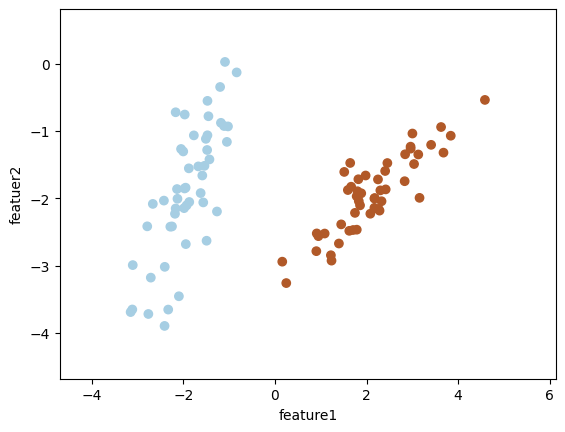

In [3]:
# 데이터 시각화
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=plt.cm.Paired)

plt.xlabel('feature1')
plt.ylabel('featuer2')

plt.margins(0.2)

plt.show()

## 하드 마진 SVM

In [5]:
svm_hard_margin = SVC(kernel='linear', C=1000) # C는슬랙 변수
svm_hard_margin.fit(X1, y1)

SVC(C=1000, kernel='linear')

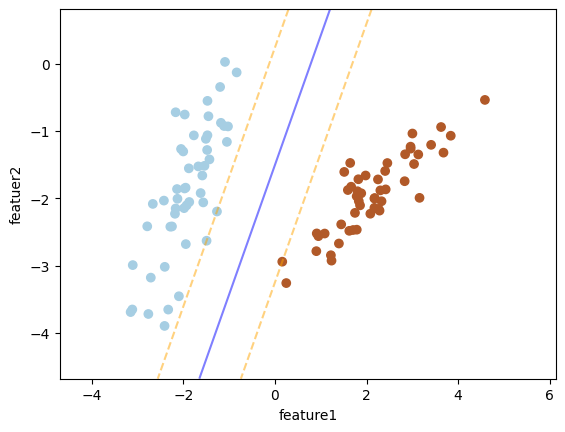

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=plt.cm.Paired)

plt.xlabel('feature1')
plt.ylabel('featuer2')

plt.margins(0.2)

# 현재 그래프의 x축과 y축 범위를 가져옴
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# 그래프의 x & y축 범위를 바탕으로 모든 x,y 조합의 좌표 그리드를 생성
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# 그리드 포인트를 이용해 각 포인트에서의 Desicion 결과값을 출력
Z = svm_hard_margin.decision_function(
    np.column_stack(
        (xx.ravel(), # xx matrix를 1차원 행렬로 flatten
        yy.ravel())  # yy matrix를 1차원 행렬로 flatten
     ) # 1 차원 행렬을 열 방향으로 묶어줌
) # 입력된 각 (x, y) 포인트에 대해 결정 경계로부터의 거리를 계산
Z = Z.reshape(xx.shape)

# 결정 경계와 마진 직선을 그리는 함수
plt.contour(xx, yy, # xx와 yy 공간 안에
            Z, # Z를 그릴건데
            levels=[-1, 0, 1], # Z가 -1, 0, 1 인 부분만 그릴것!
            colors=['orange', 'blue', 'orange'],
            alpha=0.5,
            linestyles=['--', '-', '--'] # -1, 0, 1 의 직선 개형을 표시
)

## 소프트 마진 SVM

In [7]:
# 데이터 생성
X2, y2 = make_classification(n_samples=100, # 생성할 데이터 수
                             n_features=2, # 사용할 특성의 수
                             n_redundant=0, # 중복 특성(다른 특성으로부터 파생된 특성) 수
                             n_clusters_per_class=1, # 클래스 당 클러스터의 수
                             flip_y=0.06, #  클래스 레이블이 뒤바뀔 확률, 노이즈에 해당
                             class_sep=1.5, # 클래스 간 분리도를 조절, 높을수록 분리가 잘 됨을 의미
                             random_state=5)

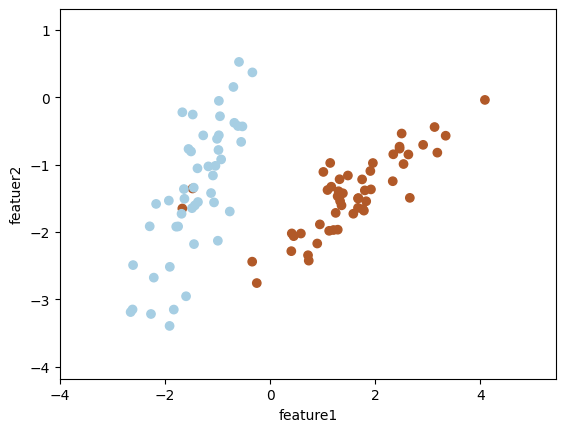

In [8]:
# 데이터 시각화
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.Paired)

plt.xlabel('feature1')
plt.ylabel('featuer2')

plt.margins(0.2)

plt.show()

In [9]:
svm_soft_margin = SVC(kernel='linear', C=0.1) #C-> 위반한것을 감안
svm_soft_margin.fit(X2, y2)

SVC(C=0.1, kernel='linear')

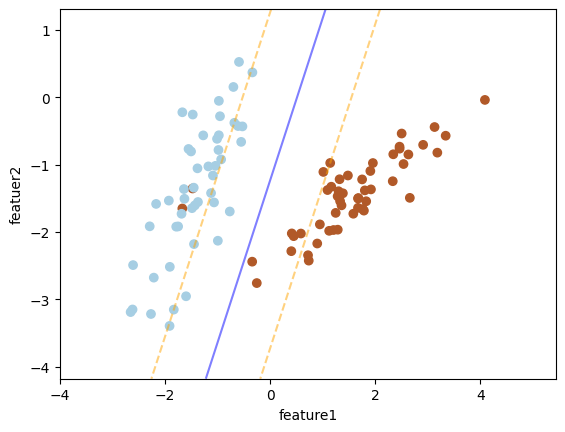

In [10]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.Paired)

plt.xlabel('feature1')
plt.ylabel('featuer2')

plt.margins(0.2)

# 현재 그래프의 x축과 y축 범위를 가져옴
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# 그래프의 x & y축 범위를 바탕으로 모든 x,y 조합의 좌표 그리드를 생성
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# 그리드 포인트를 이용해 각 포인트에서의 Desicion 결과값을 출력
Z = svm_soft_margin.decision_function(
    np.column_stack(
        (xx.ravel(), # xx matrix를 1차원 행렬로 flatten
        yy.ravel())  # yy matrix를 1차원 행렬로 flatten
     ) # 1 차원 행렬을 열 방향으로 묶어줌
) # 입력된 각 (x, y) 포인트에 대해 결정 경계로부터의 거리를 계산
Z = Z.reshape(xx.shape)

# 결정 경계와 마진 직선을 그리는 함수
plt.contour(xx, yy, # xx와 yy 공간 안에
            Z, # Z를 그릴건데
            levels=[-1, 0, 1], # Z가 -1, 0, 1 인 부분만 그릴것!
            colors=['orange', 'blue', 'orange'],
            alpha=0.5,
            linestyles=['--', '-', '--'] # -1, 0, 1 의 직선 개형을 표시
)

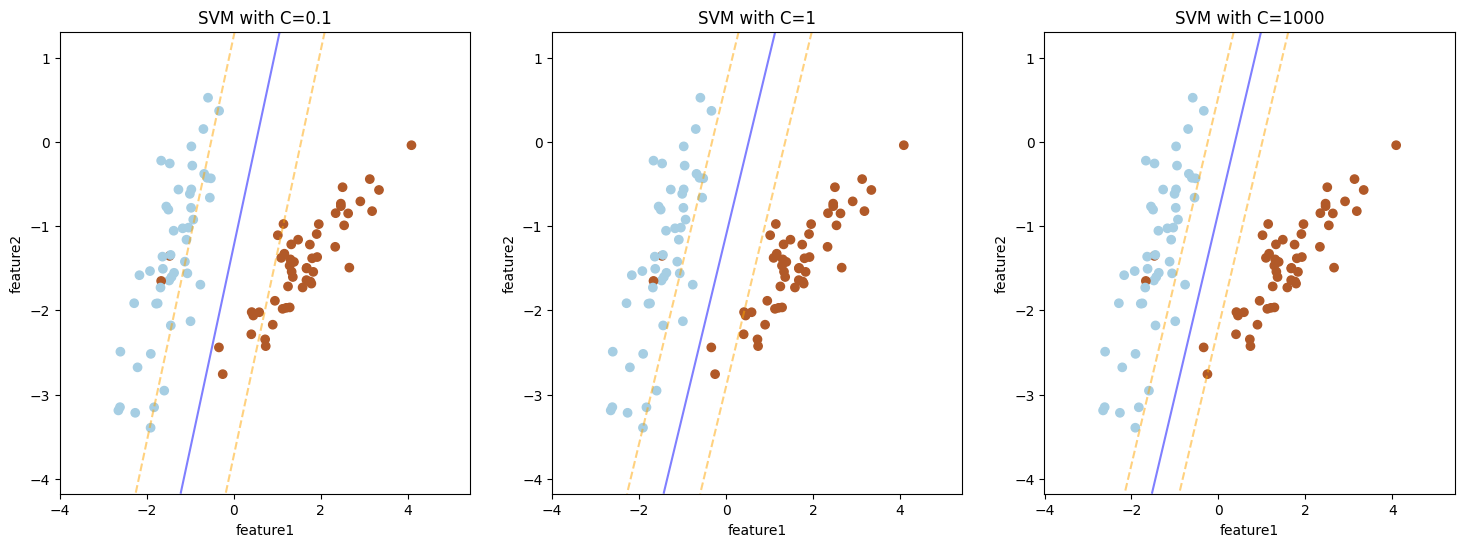

In [12]:
def plot_svm_decision_boundary(svm_model, X, y, title):
    """Plot the decision boundary of an SVM model."""
    svm_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.margins(0.2)

    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

    Z = svm_model.decision_function(np.column_stack((xx.ravel(), yy.ravel())))
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['orange', 'blue', 'orange'], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(title)

# 서로 다른 규제 변수를 갖는 3개의 모델 생성
svm_C_0_1 = SVC(kernel='linear', C=0.1)
svm_C_1 = SVC(kernel='linear', C=1)
svm_C_1000 = SVC(kernel='linear', C=1000)

# 시각화
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_svm_decision_boundary(svm_C_0_1, X2, y2, "SVM with C=0.1")

plt.subplot(1, 3, 2)
plot_svm_decision_boundary(svm_C_1, X2, y2, "SVM with C=1")

plt.subplot(1, 3, 3)
plot_svm_decision_boundary(svm_C_1000, X2, y2, "SVM with C=1000")

plt.show()


C값이 놓아질수록 마진이 좁아짐 !

# 비선형 SVM

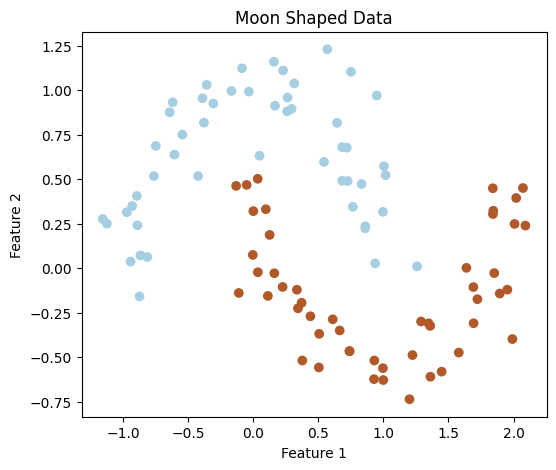

In [13]:
from sklearn.datasets import make_moons

# 데이터 생성
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=0)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.Paired)
plt.title("Moon Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

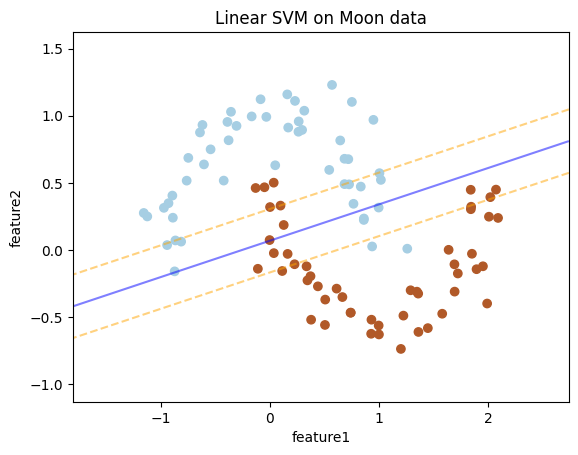

In [ ]:
# 선형 SVM 으로 분류
linear_svm = SVC(kernel='linear', C=1000)
plot_svm_decision_boundary(linear_svm, X_moons, y_moons, "Linear SVM on Moon data")

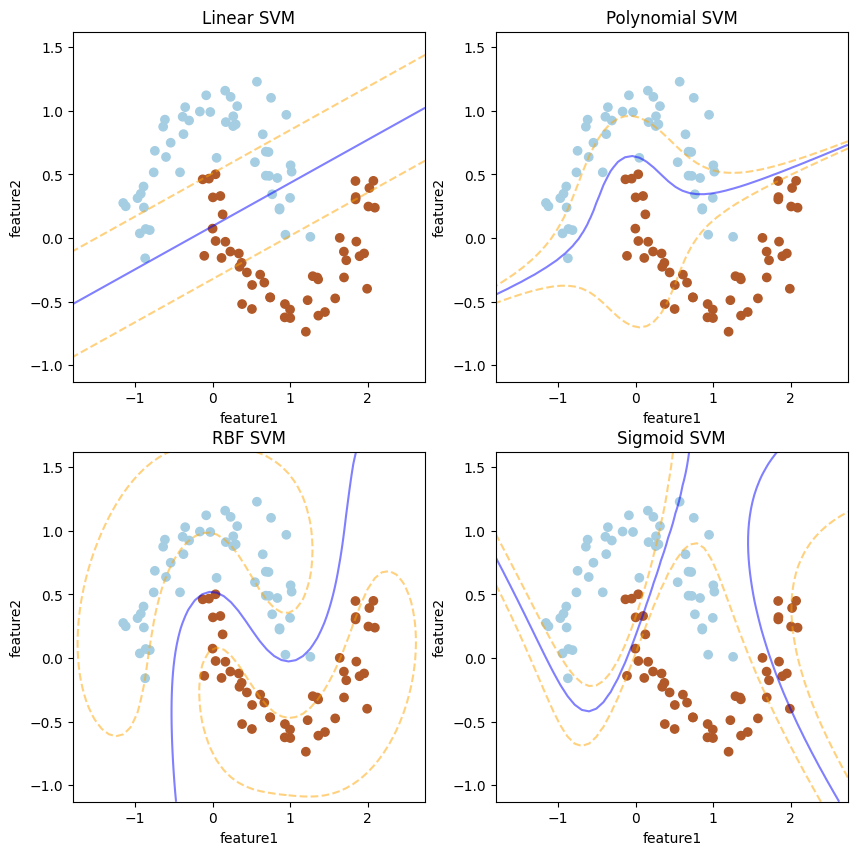

In [14]:
# 비선형 SVM 으로 분류

# 선형 커널
Linear_SVM = SVC(kernel='linear')
# 다항 커널 3차로
Poly_SVM = SVC(kernel='poly', degree=3)
# RBF 커널
RBF_SVM = SVC(kernel='rbf')
# Sigmoid 커널
sigmoid_SVM = SVC(kernel='sigmoid')

# 시각화
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plot_svm_decision_boundary(Linear_SVM, X_moons, y_moons, "Linear SVM")

plt.subplot(2, 2, 2)
plot_svm_decision_boundary(Poly_SVM, X_moons, y_moons, "Polynomial SVM")

plt.subplot(2, 2, 3)
plot_svm_decision_boundary(RBF_SVM, X_moons, y_moons, "RBF SVM")

plt.subplot(2, 2, 4)
plot_svm_decision_boundary(sigmoid_SVM, X_moons, y_moons, "Sigmoid SVM")


# SVR, Support Vector Regression

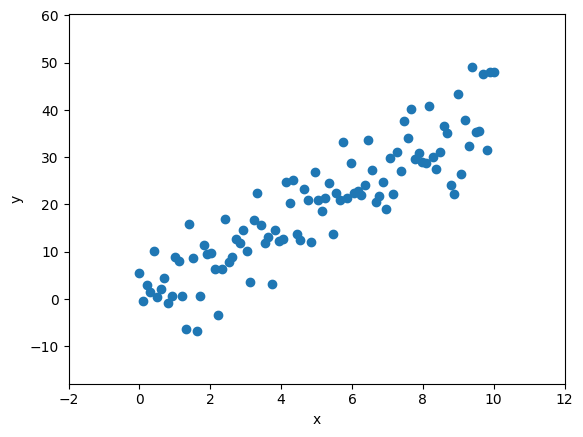

In [15]:
# 데이터 생성 변수
w0 = 2.3
w1 = 3.5
num_data = 100
noise = np.random.normal(0, 6, num_data)

# 데이터 생성
x = np.linspace(0, 10, num_data)
y = w0 + w1 * x + noise

# 시각화
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.margins(0.2)
plt.show()

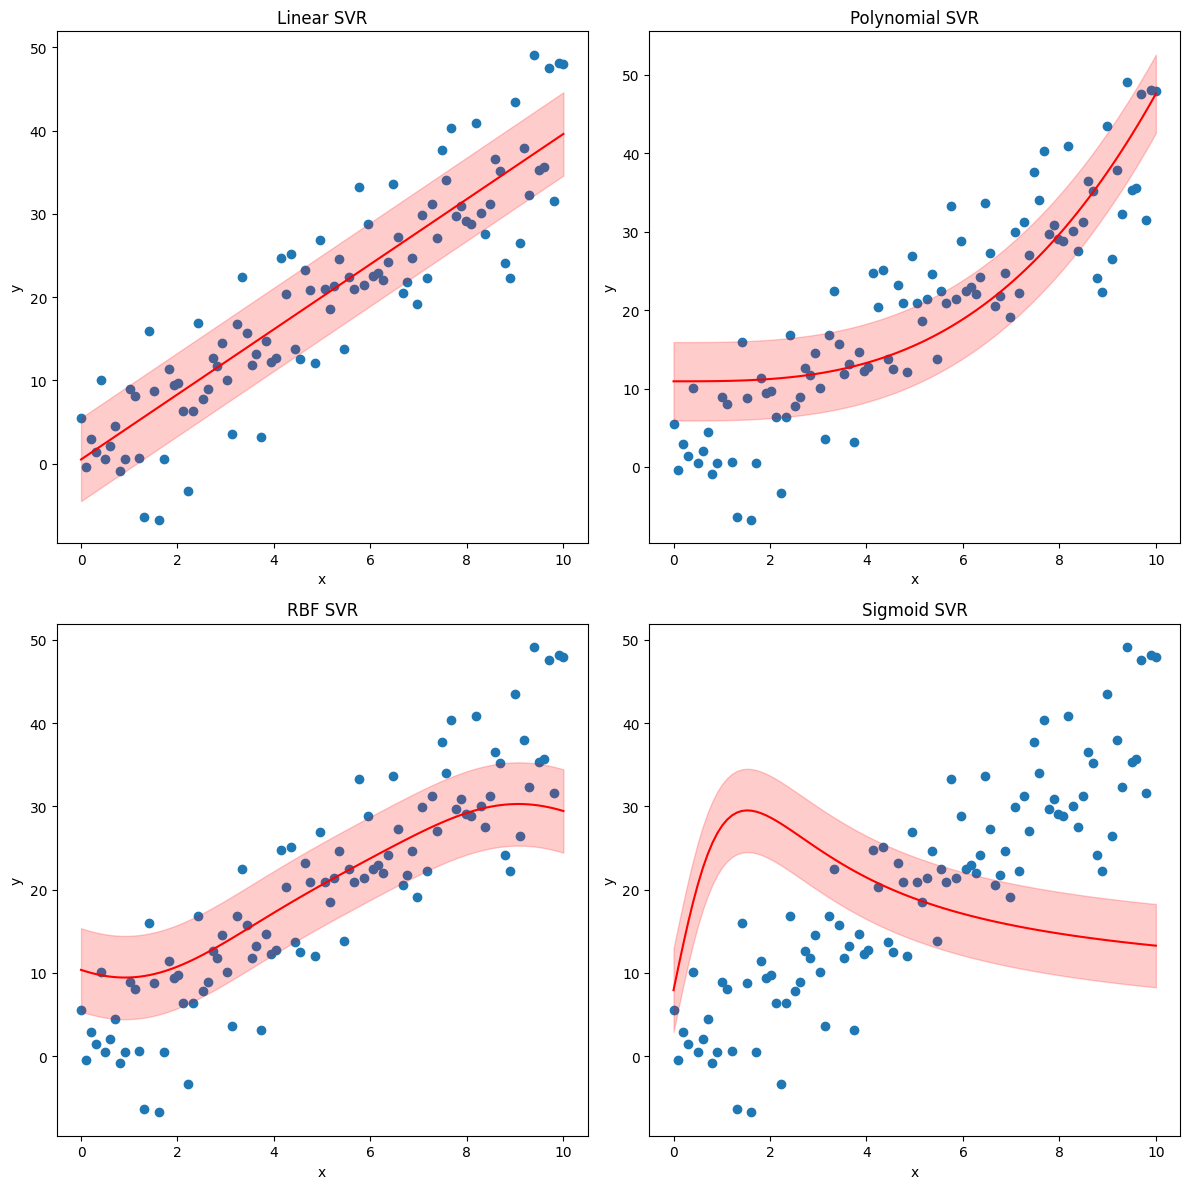

In [16]:
from sklearn.svm import SVR

epsilon = 5

# SVR 객체 생성
svr_linear = SVR(kernel='linear', epsilon=epsilon)
svr_poly = SVR(kernel='poly', degree=3, epsilon=epsilon)
svr_rbf = SVR(kernel='rbf', epsilon=epsilon)
svr_sigmoid = SVR(kernel='sigmoid', epsilon=epsilon)

# SVR 모델 학습
svr_linear.fit(x.reshape(-1, 1), y)
svr_poly.fit(x.reshape(-1, 1), y)
svr_rbf.fit(x.reshape(-1, 1), y)
svr_sigmoid.fit(x.reshape(-1, 1), y)

# 그림을 그리기 위한 X 좌표 생성
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# X 좌표에 대한 Y 출력 결과 도출
y_linear = svr_linear.predict(x_range)
y_poly = svr_poly.predict(x_range)
y_rbf = svr_rbf.predict(x_range)
y_sigmoid = svr_sigmoid.predict(x_range)

plt.figure(figsize=(12, 12))

# Linear 커널
plt.subplot(2, 2, 1)
plt.scatter(x, y)
plt.plot(x_range, y_linear, color='red')
plt.fill_between(x_range.ravel(), y_linear - svr_linear.epsilon, y_linear + svr_linear.epsilon, color='red', alpha=0.2)
plt.title("Linear SVR")
plt.xlabel('x')
plt.ylabel('y')

# Polynomial 커널
plt.subplot(2, 2, 2)
plt.scatter(x, y)
plt.plot(x_range, y_poly, color='red')
plt.fill_between(x_range.ravel(), y_poly - svr_poly.epsilon, y_poly + svr_poly.epsilon, color='red', alpha=0.2)
plt.title("Polynomial SVR")
plt.xlabel('x')
plt.ylabel('y')

# RBF 커널
plt.subplot(2, 2, 3)
plt.scatter(x, y)
plt.plot(x_range, y_rbf, color='red')
plt.fill_between(x_range.ravel(), y_rbf - svr_rbf.epsilon, y_rbf + svr_rbf.epsilon, color='red', alpha=0.2)
plt.title("RBF SVR")
plt.xlabel('x')
plt.ylabel('y')

# Sigmoid 커널
plt.subplot(2, 2, 4)
plt.scatter(x, y)
plt.plot(x_range, y_sigmoid, color='red')
plt.fill_between(x_range.ravel(), y_sigmoid - svr_sigmoid.epsilon, y_sigmoid + svr_sigmoid.epsilon, color='red', alpha=0.2)
plt.title("Sigmoid SVR")
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()